In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load data

#### 1.1. Load the dataset king-house-prices.csv. This is a tab-separated file, but let’s first load it in the wrong way, using the default separator (comma). How many rows and columns do you have?

In [2]:
kingHouse = pd.read_csv('king-house-prices.csv.bz2')
print(kingHouse.shape)

(21613, 1)


21613 rows and 1 column

#### 1.2. Print a few random lines of data.

In [3]:
print(kingHouse.sample(3))

      id\tdate\tprice\tbedrooms\tbathrooms\tsqft_living\tsqft_lot\tfloors\twaterfront\tview\tcondition\tgrade\tsqft_above\tsqft_basement\tyr_built\tyr_renovated\tzipcode\tlat\tlong\tsqft_living15\tsqft_lot15
7197   717000225\t2014-10-28\t235000\t2\t2\t870\t6450...                                                                                                                                                       
15891  9474700020\t2014-05-03\t310000\t3\t1\t1010\t99...                                                                                                                                                       
10418  6632900354\t2014-09-10\t242500\t3\t1\t1020\t58...                                                                                                                                                       


#### 1.3. Now load it correctly–use tab as separator. How many rows and columns do you have now?

In [4]:
kingHouse = pd.read_csv('king-house-prices.csv.bz2', sep="\t")
print(kingHouse.shape)

(21613, 21)


21613 rows and 21 columns

#### 1.4. Print a few lines of data.

In [5]:
print(kingHouse.sample(3))

               id        date     price  bedrooms  bathrooms  sqft_living  \
4792   3856901435  2014-10-27  720000.0         4        2.0         1760   
2588   9215400075  2015-04-22  406000.0         3        1.0          960   
15663  6123600285  2014-11-07  185000.0         3        1.5         1010   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
4792       4500     1.5       False     0  ...      7        1760   
2588       5264     1.0       False     0  ...      7         960   
15663      7755     1.0       False     0  ...      6        1010   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4792               0      1906             0    98103  47.6711 -122.331   
2588               0      1953             0    98115  47.6805 -122.301   
15663              0      1953             0    98148  47.4238 -122.332   

       sqft_living15  sqft_lot15  
4792            1740        4220  
2588            1140        5150  
15663   

#### 1.5. Comment on what do you see when you get the separator wrong or right.

When the separator is wrong, we only get 1 variable because all the variables are tied up together with /t, but when the separator is right, we get all 21 variables.

#### 1.6. Below, we only use variables date, price, condition, lat, long and waterfront. Make a subset that only contains these columns.

In [6]:
vars = ["date", "price", "condition", "lat", "long", "waterfront"]
kingHouseCondensed = kingHouse[vars].copy()

## 2. Listing Price

#### 2.1. Compute the average listing price

In [7]:
avgListPrice = kingHouseCondensed.price.mean()
print(avgListPrice)

540088.1417665294


The average listing price is about \\$540088.

#### 2.2. Now compute the average price in each of the “condition” category. Comment what you see.

In [8]:
kingHouseCondensed.groupby("condition").price.mean()

condition
1    334431.666667
2    327287.145349
3    542012.578148
4    521200.390033
5    612418.089359
Name: price, dtype: float64

The lowest average price is when condition is 2 and highest when condition is 5. Also houses with condition 1 list at a higher price than 2, same with condition 3 and 4.

#### 2.3. Print three most expensive and three cheapest listings

In [9]:
topThree = kingHouseCondensed.nlargest(3, ["price"])
bottomThree = kingHouseCondensed.nsmallest(3, ["price"])
print(topThree)
print(bottomThree)

            date      price  condition      lat     long  waterfront
7252  2014-10-13  7700000.0          4  47.6298 -122.323       False
3914  2014-06-11  7062500.0          3  47.6500 -122.214        True
9254  2014-09-19  6885000.0          3  47.6305 -122.240       False
             date    price  condition      lat     long  waterfront
1149   2015-02-17  75000.0          3  47.2638 -121.906       False
15293  2014-05-06  78000.0          1  47.4739 -122.280       False
465    2014-05-23  80000.0          2  47.6499 -121.909       False


The three most expensive listings are \\$7,700,000, \\$7,062,500, and \\$6,885,000. The three cheapest listings are \\$75,000, \\$78,000, and \\$80,000.

#### 2.4. Now create a single data frame that contains both 3 cheapest and 3 most expensive listings. The data frame should contain 6 rows. Sort the result by price.

In [10]:
topBotThree = pd.concat([topThree, bottomThree]).sort_values(by=["price"])
print(topBotThree)

             date      price  condition      lat     long  waterfront
1149   2015-02-17    75000.0          3  47.2638 -121.906       False
15293  2014-05-06    78000.0          1  47.4739 -122.280       False
465    2014-05-23    80000.0          2  47.6499 -121.909       False
9254   2014-09-19  6885000.0          3  47.6305 -122.240       False
3914   2014-06-11  7062500.0          3  47.6500 -122.214        True
7252   2014-10-13  7700000.0          4  47.6298 -122.323       False


#### 2.5. Now use .groupby() and .idxmax() methods to extract the cheapest and the most expensive listing for each “condition” category, and .loc[] method to extract based on index.

In [11]:
indexMax = topBotThree.loc[topBotThree.groupby("condition")["price"].idxmax()]
print(indexMax)

             date      price  condition      lat     long  waterfront
15293  2014-05-06    78000.0          1  47.4739 -122.280       False
465    2014-05-23    80000.0          2  47.6499 -121.909       False
3914   2014-06-11  7062500.0          3  47.6500 -122.214        True
7252   2014-10-13  7700000.0          4  47.6298 -122.323       False


The most expensive in condition category 1, 2, 3, 4 are \\$78,000, \\$80,000, \\$7,062,500, \\$47,700,000 respectively.

## 3. Proportions

#### 3.1. Which percentage of listing are cheaper than \\$200,000? Which percentage of listings are over $1M? Use .mean(), not adding and dividing!

In [12]:
percentCheaper = (kingHouseCondensed.price < 200000).mean() * 100
print(percentCheaper)
percentExpensive = (kingHouseCondensed.price > 1000000).mean() * 100
print(percentExpensive)

3.6367001341785032
6.778327858233471


About 3.64% of the listings are cheaper than \\$200,000, and about 6.78% of the listings are more expensive than $1M.

#### 3.2. What percentage of listings cost less than $1M and are overlooking waterfront?

In [13]:
percentCheaperWaterfront = ((kingHouseCondensed.waterfront == True) & (kingHouseCondensed.price < 1000000)).mean() * 100
print(percentCheaperWaterfront)

0.26835700735668344


About 0.27% of the listings cost less than \\$1M and are overlooking waterfront.

## 4. Plotting

#### 4.1. Make a plot of longitude/latitude of the listings. Use different colors for waterfront/non-waterfront properties. Label the plot appropriately.

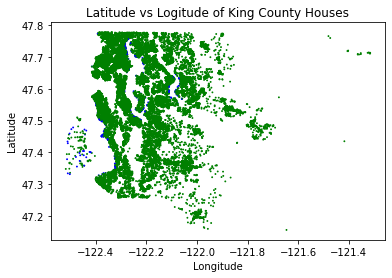

In [37]:
x = kingHouseCondensed.long
y = kingHouseCondensed.lat
z = kingHouseCondensed.waterfront
colors = {True:'blue', False:'green'}
latLongPlot = plt.scatter(x, y, s=0.75, c=z.map(colors))
latLongPlot = plt.xlabel("Longitude")
latLongPlot = plt.ylabel("Latitude")
latLongPlot = plt.title("Latitude vs Logitude of King County Houses")
latLongPlot = plt.show()


I see the shape of Seattle, and waterfront properties are near lakes and seashore.